
# **Predicting Price of House using KNearestNeighbour Regressor**

### 1.Use pandas to get some insights into the data (10 marks)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [55]:
df = pd.read_csv("/content/house_rental_data.csv.txt")
df.drop('Unnamed: 0', axis=1, inplace= True)

In [56]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [58]:
df.shape

(645, 7)

In [59]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [60]:
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [61]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [62]:
df['Floor'].unique()

array([ 2,  5, 11, 10,  4,  9,  6,  3, 19,  7, 21,  8,  1, 12, 13, 18, 14,
       16, 15, 22, 17])

In [63]:
d = df.duplicated().sum()
print(f'There are {d} duplicate rows in thie dataset.')
df = df.drop_duplicates()
print()
print("Removing duplicates")
print()
d = df.duplicated().sum()
print(f'There are {d} duplicate rows in this dataset.')

There are 66 duplicate rows in thie dataset.

Removing duplicates

There are 0 duplicate rows in this dataset.


In [64]:
print(f'The price of the houses ranges from {df.Price.min()} to {df.Price.max()}.')

The price of the houses ranges from 6100 to 250000.


In [65]:
df.sort_values(by=['Price'], inplace=True)

### 2.Show some interesting visualization of the data (10 marks)

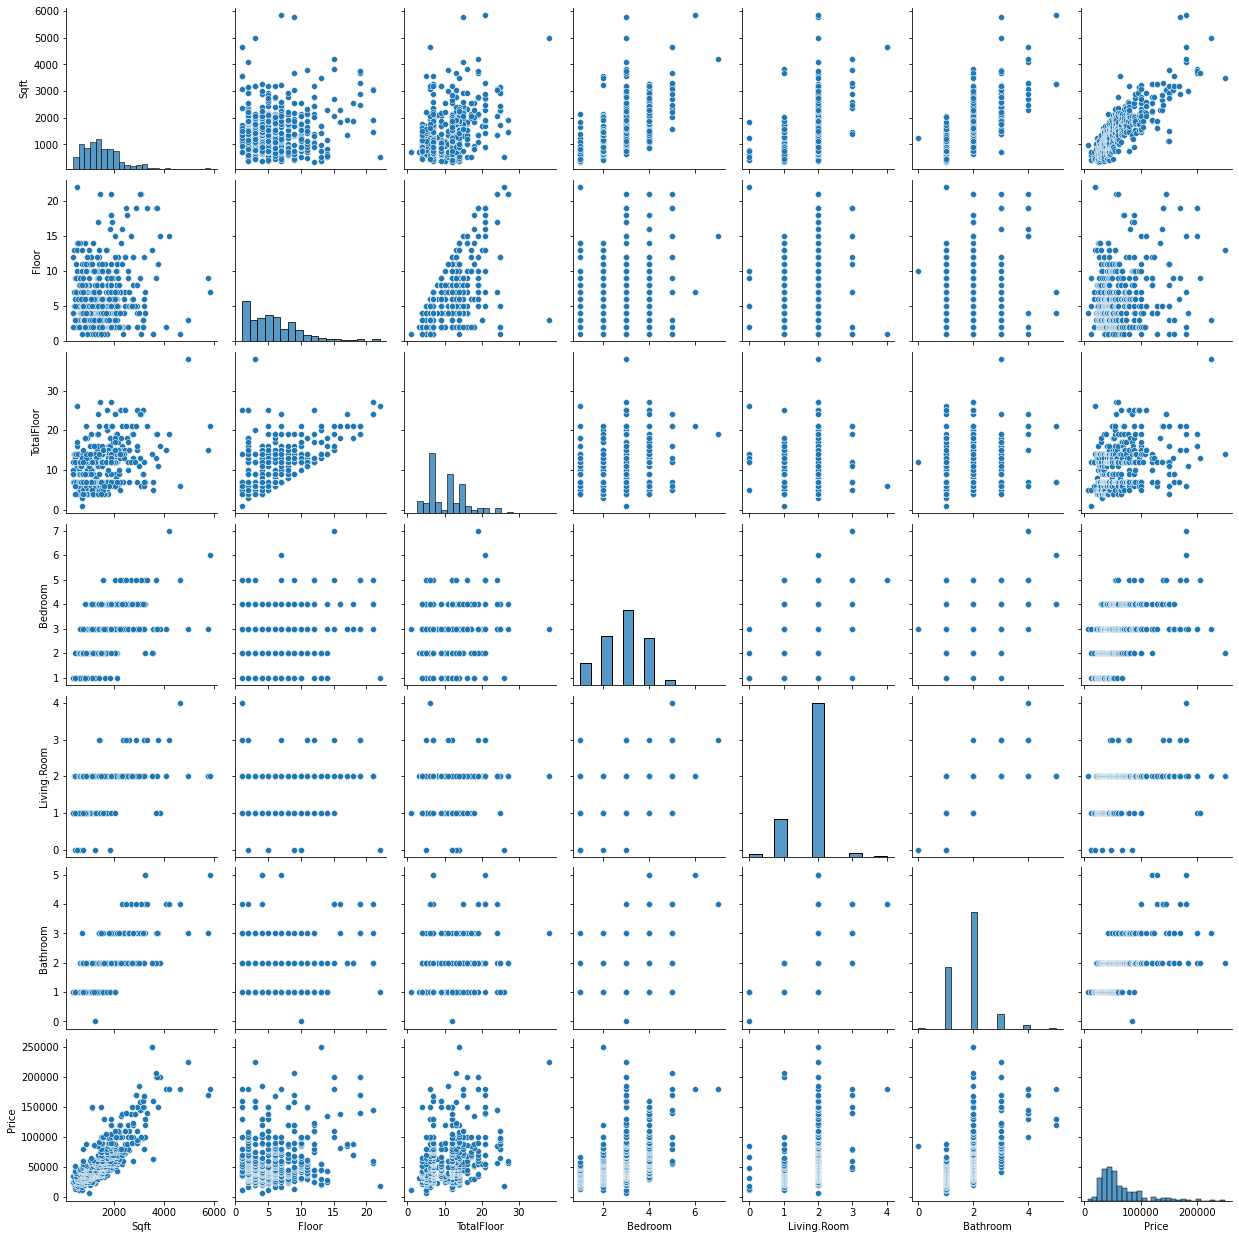

In [66]:
sns.pairplot(df)

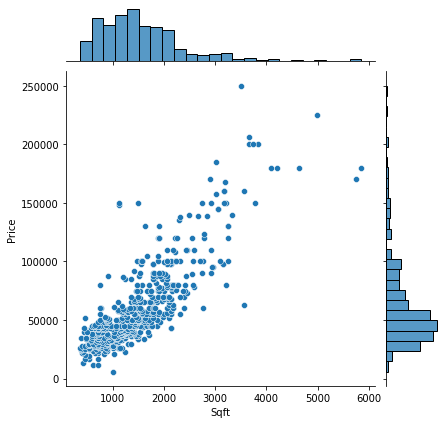

In [67]:
sns.jointplot(x='Sqft', y='Price', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


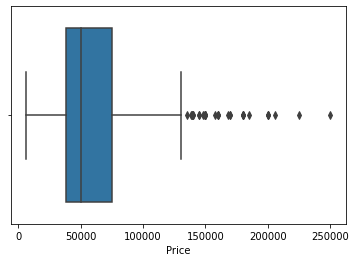

In [68]:
sns.boxplot(df['Price'])

### 3. Manage data for training & testing (20)

In [69]:
x = df.drop('Price', axis = 1)
y= df['Price']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.30, random_state = 0)

In [74]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt, ceil

In [78]:
c = ceil(sqrt(len(y)))
c

25

In [81]:
for i in range(0, c+1):
  model = KNeighborsRegressor()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  print(i, error)
  

0 21575.79113706714
1 21575.79113706714
2 21575.79113706714
3 21575.79113706714
4 21575.79113706714
5 21575.79113706714
6 21575.79113706714
7 21575.79113706714
8 21575.79113706714
9 21575.79113706714
10 21575.79113706714
11 21575.79113706714
12 21575.79113706714
13 21575.79113706714
14 21575.79113706714
15 21575.79113706714
16 21575.79113706714
17 21575.79113706714
18 21575.79113706714
19 21575.79113706714
20 21575.79113706714
21 21575.79113706714
22 21575.79113706714
23 21575.79113706714
24 21575.79113706714
25 21575.79113706714
